<a href="https://colab.research.google.com/github/anatejerom/PRA3024/blob/main/Assignment_2_problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, 'strain')

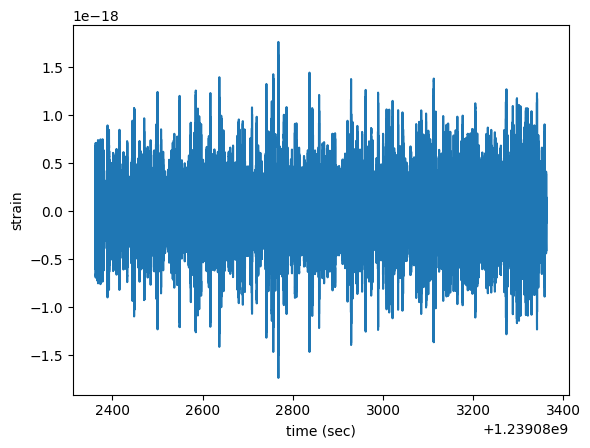

In [4]:
! pip install pycbc
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
import numpy as np
import pycbc
from pycbc.types import FrequencySeries, TimeSeries
import matplotlib.pyplot as plt
d = np.load('noise_ts_4096Hz.npy')
time = d[:, 0]
d = pycbc.types.TimeSeries(d[:, 1], delta_t = time[1]-
time[0])
data = d
plt.plot(time, data)
plt.xlabel('time (sec)')
plt.ylabel('strain')


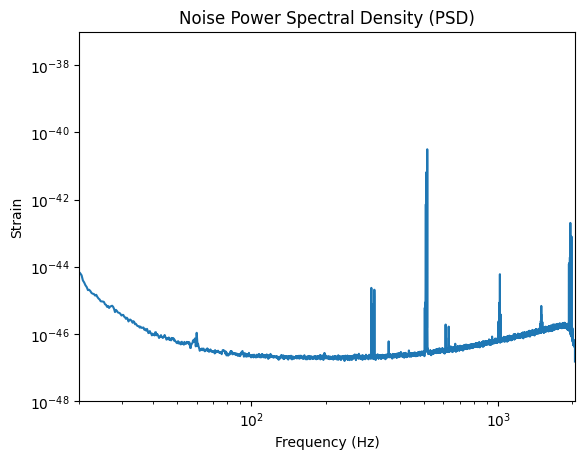

In [18]:
#Part 1: PSD plot
psd = data.psd(4) #to find power spectral density of data
plot=plt.loglog(psd.sample_frequencies, psd)
plt.title('Noise Power Spectral Density (PSD)')
plt.xlim(xmin=20, xmax=psd.sample_rate/2)
plt.ylim(ymin=1e-48,ymax=1e-37)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Strain')
plt.show()

0.001


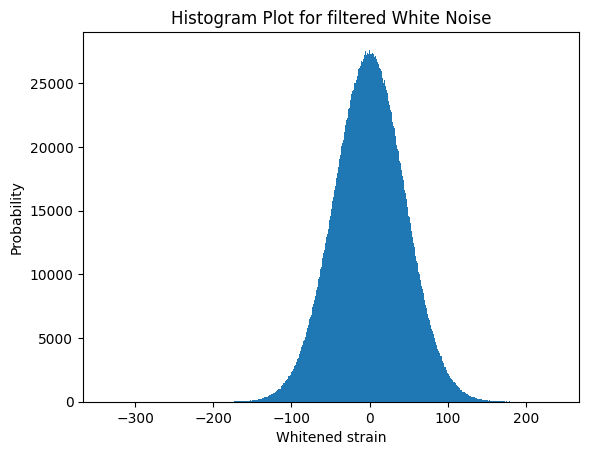

In [36]:
#Part 2: Histogram plot for filtered white noise
from pycbc.psd import interpolate
print(psd.delta_f)
psd = interpolate(psd, data.delta_f) #to make delta f of psd the same as delta f of data
psd[0] = psd[1]
psd[len(psd) - 1] = psd[len(psd) - 2]
data_whitened = (data.to_frequencyseries() / psd**0.5).to_timeseries()
data_whitened = data_whitened.crop(4,4)
plt.title('Histogram Plot for filtered White Noise')
plt.xlabel('Whitened strain')
plt.ylabel('Probability')
hist=plt.hist(data_whitened,bins='auto')


In [65]:
from pycbc.filter import sigmasq
from pycbc.waveform import get_fd_waveform

hp, hc = get_fd_waveform(approximant="TaylorF2",
mass1=3,
mass2=3,
delta_f=1.0/(200.0) ,
distance = 500,
f_lower=20.0, f_final = 2048.0) #Luminosity distance = 500 M

# To make psd the same value as hp
psd = interpolate(psd, data.delta_f)
psd[0] = psd[1]
psd[len(psd) - 1] = psd[len(psd) - 2]

hp = interpolate(hp, data.delta_f)
hp[0] = hp[1]
hp[len(psd) - 1] = hp[len(psd) - 2]

SNR = (pycbc.filter.sigmasq(hp, psd))**0.5


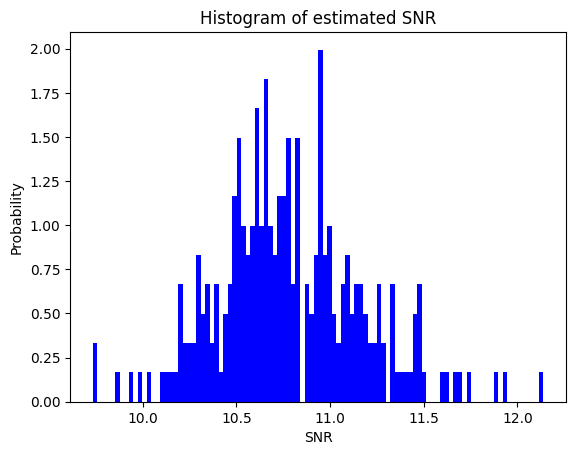

In [74]:
#Part 3: Test to show that stationarity does not hold
import numpy as np
import pycbc
from pycbc.types import TimeSeries
from pycbc.psd import welch
from pycbc.filter import sigmasq

#citation starts here
chunk_duration = 4  # Duration of each chunk in seconds
total_duration = len(data) * data.delta_t
num_chunks = int(total_duration / chunk_duration)

# For loop to divide in chunks and calculate PSD and SNR for each one
snr_list = []
for i in range(num_chunks):
    start_idx = i * int(chunk_duration / data.delta_t)
    end_idx = (i + 1) * int(chunk_duration / data.delta_t)
    chunk_data = data[start_idx:end_idx]
    psd = welch(chunk_data)
    hp, hc = pycbc.waveform.get_fd_waveform(approximant="TaylorF2", mass1=3, mass2=3, delta_f=psd.delta_f, distance=500, f_lower=20.0, f_final=2048.0)
    snr = (sigmasq(hp, psd))**0.5
    snr_list.append(snr)

# Plot histogram
plt.hist(snr_list, bins=100, density=True, color='blue')
plt.xlabel('SNR')
plt.ylabel('Probability')
plt.title('Histogram of estimated SNR')
plt.show()
#citation ends here (Chat GPT, 2024)
##REFERENCES
#OpenAI. (2024). ChatGPT (Chat GPT 3.5) [Large language model]. https://chat.openai.com/chat

In [ ]:
# In reality, stationarity does not hold as shown in this test, which prooves that when noise is divided into intervals, each interval has a different SNR value.